In [3]:
import glob
import subprocess
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

data_dir = "/Users/hunterholland/Documents/Research/Laidlaw/Data"

## Denoting Sample Files

In [4]:
spitzer_sample = None
chandra_sample = f"{data_dir}/L1521E/Chandra/primary/acisf07419N002_evt2.fits"
xmm_sample = f"{data_dir}/L1251BE/XMM/PPS/P0201540101PNS003PIEVLI0000.FTZ"
rosat_sample = None
swift_sample = None

# Chandra
## Event File Info

In [5]:
hdu_list = fits.open(chandra_sample, memmap=True)
hdu_list.info()

Filename: /Users/hunterholland/Documents/Research/Laidlaw/Data/L1521E/Chandra/primary/acisf07419N002_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  EVENTS        1 BinTableHDU    897   23381R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           5 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  7  GTI           8 BinTableHDU     28   1R x 2C   [1D, 1D]   


## Event Column Names

In [6]:
evt_table = hdu_list[1]
evt_table.columns
# energy column name = "energy"

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

In [7]:
evt_data = evt_table.data
energy = evt_data["energy"]

## Stratifying Energy Levels

In [8]:
energy_0_2000 = energy[(evt_data["energy"]>=0) & (evt_data["energy"]<2000)]
energy_2000_4000 = energy[(evt_data["energy"]>=2000) & (evt_data["energy"]<4000)]
energy_4000_8000 = energy[(evt_data["energy"]>=4000) & (evt_data["energy"]<8000)]
energy_8000_16000 = energy[(evt_data["energy"]>=8000) & (evt_data["energy"]<16000)]


e_bands = [energy_0_2000, energy_2000_4000, energy_4000_8000, energy_8000_16000]

## Messing Around with Data Analysis
### Making Figures

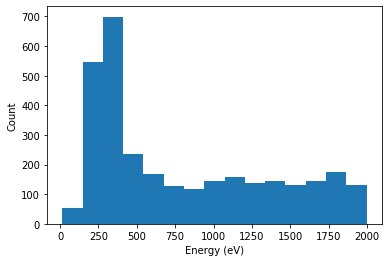

In [18]:
evt_data = fits.getdata(chandra_sample)
energy = evt_data["energy"]
min_thresh = energy>=0
max_thresh = energy<2000
e_band = energy[min_thresh & max_thresh]
plt.hist(e_band, bins='auto')
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

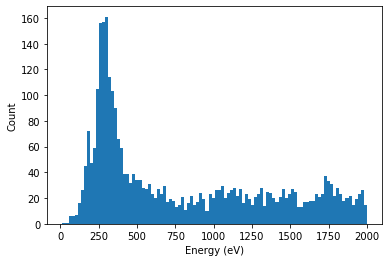

In [12]:
energy_hist = plt.hist(energy_0_2000, bins=100)
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

### Filtering Files in Place

# XMM-Newton
## Event File Info

In [ ]:
hdu_list = fits.open(xmm_sample, memmap=True)
hdu_list.info()

## Event Column Names

In [ ]:
evt_table = hdu_list[1]
evt_table.columns
# energy column name = "PI"

In [ ]:
evt_data = evt_table.data
energy = evt_data["PI"]

## Stratifying Energy Levels

In [20]:
energy_0_2000 = energy[(energy>=0) & (energy<2000)]
energy_2000_4000 = energy[(energy>=2000) & (energy<4000)]
energy_4000_8000 = energy[(energy>=4000) & (energy<8000)]
energy_8000_16000 = energy[(energy>=8000) & (energy<16000)]

## Messing Around with Data Analysis
### Making Figures

### Filtering Files in Place